In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from itertools import product
import matplotlib.pyplot as plt

In [46]:
data = pd.read_csv('data_j.csv')
data1 = pd.read_csv('prediction_u.csv')
data = data.dropna()
data1 = data1.dropna()
data.head()

,id,pm01_m,pm25_m,pm10_m,temperature_m,humidity_m,iqa_pm25,iqa_pm10,event
0,1,23,55,74,23,91,0,0,2023-02-15
1,2,15,34,45,22,74,0,0,2023-02-16
2,3,10,20,25,20,73,0,0,2023-02-17
3,4,6,12,15,21,69,0,0,2023-02-18
4,5,6,12,15,22,70,0,0,2023-02-19


In [47]:
data.size,data1.size

(2223, 270)

In [48]:
data['Date'] = pd.to_datetime(data['event'])
data1['Date'] = pd.to_datetime(data1['date'])

In [49]:
data = data.set_index('Date')
data1 = data1.set_index('Date')

In [50]:
data = data.sort_index()

In [51]:
start_date = '2023-09-22'

In [73]:
end_date = '2023-11-02'
end_date1 = '2023-11-02'

In [74]:
selected_data = data[start_date:end_date]
selected_data1 = data1[:end_date1]

In [76]:
series_data = selected_data['pm25_m']
serie_datap = selected_data1['pm25_p']

In [77]:
series_data

Date
2023-09-22     12
2023-09-23     10
2023-09-24     24
2023-09-25     20
2023-09-26     19
2023-09-27     12
2023-09-28     30
2023-09-29     48
2023-09-30     28
2023-10-01     48
2023-10-02     61
2023-10-03     33
2023-10-04     20
2023-10-05     21
2023-10-06     25
2023-10-07     22
2023-10-08     18
2023-10-09     32
2023-10-10     54
2023-10-11     34
2023-10-12     26
2023-10-13     26
2023-10-14     23
2023-10-15     27
2023-10-16     26
2023-10-17     17
2023-10-18     42
2023-10-19     47
2023-10-20     58
2023-10-21     39
2023-10-22     22
2023-10-23     20
2023-10-24     12
2023-10-25     44
2023-10-26     27
2023-10-27     87
2023-10-28    100
2023-10-29     46
2023-10-30    105
2023-10-31     93
2023-11-01     97
2023-11-02    120
Name: pm25_m, dtype: int64

In [78]:
serie_datap

Date
2023-09-22    15.00
2023-09-23    14.00
2023-09-24    12.00
2023-09-25    20.00
2023-09-26    18.51
2023-09-27    19.42
2023-09-28    15.07
2023-09-29    22.89
2023-09-30    29.49
2023-10-01    26.06
2023-10-02    39.43
2023-10-03    47.25
2023-10-04    32.95
2023-10-05    25.87
2023-10-06    21.37
2023-10-07    23.20
2023-10-08    20.66
2023-10-09    19.59
2023-10-10    26.76
2023-10-11    40.33
2023-10-12    29.92
2023-10-13    27.77
2023-10-14    25.88
2023-10-15    23.51
2023-10-16    24.82
2023-10-17    24.22
2023-10-18    19.08
2023-10-19    34.06
2023-10-20    36.08
2023-10-21    41.74
2023-10-22    35.83
2023-10-23    27.40
2023-10-24    25.19
2023-10-25    14.46
2023-10-26    37.83
2023-10-27    24.14
2023-10-28    54.50
2023-10-29    73.65
2023-10-30    35.08
2023-10-31    84.44
2023-11-01    62.40
2023-11-02    85.36
Name: pm25_p, dtype: float64

In [85]:
data1['pm25_p']

Date
2023-09-22     15.00
2023-09-23     14.00
2023-09-24     12.00
2023-09-25     20.00
2023-09-26     18.51
2023-09-27     19.42
2023-09-28     15.07
2023-09-29     22.89
2023-09-30     29.49
2023-10-01     26.06
2023-10-02     39.43
2023-10-03     47.25
2023-10-04     32.95
2023-10-05     25.87
2023-10-06     21.37
2023-10-07     23.20
2023-10-08     20.66
2023-10-09     19.59
2023-10-10     26.76
2023-10-11     40.33
2023-10-12     29.92
2023-10-13     27.77
2023-10-14     25.88
2023-10-15     23.51
2023-10-16     24.82
2023-10-17     24.22
2023-10-18     19.08
2023-10-19     34.06
2023-10-20     36.08
2023-10-21     41.74
2023-10-22     35.83
2023-10-23     27.40
2023-10-24     25.19
2023-10-25     14.46
2023-10-26     37.83
2023-10-27     24.14
2023-10-28     54.50
2023-10-29     73.65
2023-10-30     35.08
2023-10-31     84.44
2023-11-01     62.40
2023-11-02     85.36
2023-11-03    105.55
2023-11-04    100.90
2023-11-05    101.04
Name: pm25_p, dtype: float64

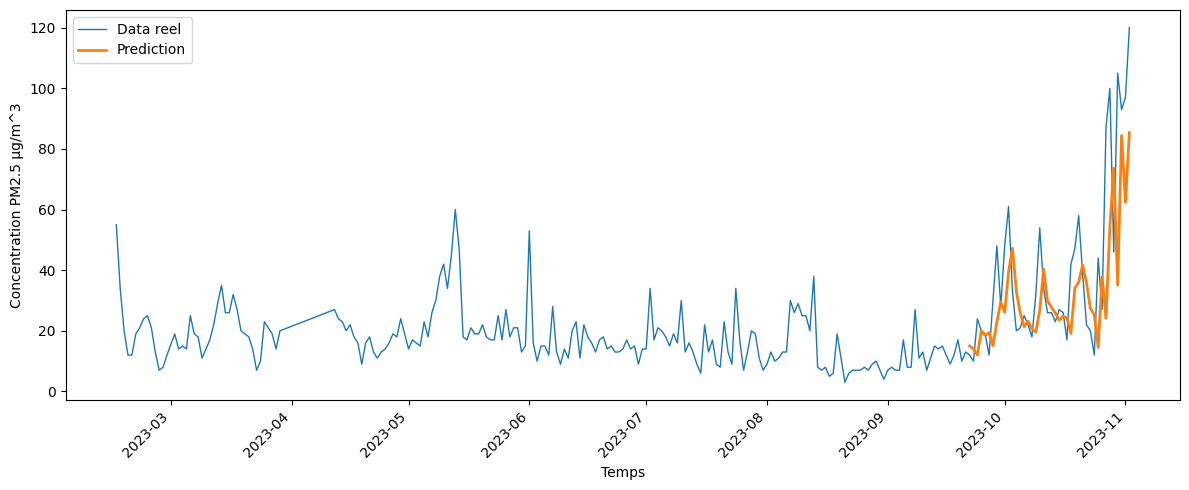

In [80]:
plt.figure(figsize=(12, 5))
data['pm25_m'].plot(label='Data reel', linewidth=1) #series_data data['pm25_m']
serie_datap.plot(label='Prediction', linewidth=2) #serie_datap data1['pm25_p']

plt.xlabel('Temps')
plt.ylabel('Concentration PM2.5 µg/m^3')
#plt.title('variation ')
plt.legend()
plt.savefig('analyse data plateforme trait1')
plt.xticks(rotation=45)  # Inclinaison des étiquettes pour une meilleure lisibilité
plt.tight_layout()

In [81]:
df = pd.DataFrame({'pm25': series_data, 'pm25_p': serie_datap})

In [84]:
df.to_csv('donnees.csv', index=True)

In [92]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm

# Charger les données à partir du fichier (assurez-vous que le fichier est correctement formaté)
data = pd.read_csv('donnees.csv')
valeurs_reelles = data['pm25']
valeurs_predites = data['pm25_p']

# Calculer les métriques d'évaluation
rmse = np.sqrt(mean_squared_error(valeurs_reelles, valeurs_predites))
mae = mean_absolute_error(valeurs_reelles, valeurs_predites)
mape = np.mean(np.abs((valeurs_reelles - valeurs_predites) / valeurs_reelles)) * 100

coefficient_de_correlation, _ = pearsonr(valeurs_reelles, valeurs_predites)


# Si vous avez les paramètres du modèle ARIMA
#ordre_arima = (2, 1, 1)  # Remplacez p, d, et q par les valeurs des paramètres du modèle ARIMA
#nombre_de_parametres = sum(ordre_arima) + 1  # Calcul du nombre total de paramètres dans le modèle ARIMA

# Calculer l'AIC et le BIC
#aic = len(valeurs_reelles) * np.log(rmse) + 2 * nombre_de_parametres
#bic = len(valeurs_reelles) * np.log(rmse) + np.log(len(valeurs_reelles)) * nombre_de_parametres

# Créer un DataFrame pour stocker les résultats
resultats = pd.DataFrame(columns=['RMSE', 'MAE', 'MAPE', 'Coefficient de corrélation'])

# Ajouter les résultats dans le DataFrame
resultats.loc[0] = [rmse, mae, mape, coefficient_de_correlation]

# Enregistrez le DataFrame dans un fichier CSV
resultats.to_csv('parametre1.csv', index=False)
print("Resultats enregistres")


Resultats enregistres
